In [1]:
# Import dependencies
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

In [2]:
mydf = pd.read_csv("myopia.csv")
mydf.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
label = mydf['MYOPIC']
label.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [4]:
mydf = mydf.drop('MYOPIC', axis=1)
mydf.head ()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
mydf.info ()
#no null + data types all good to go 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 618 entries, 0 to 617
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AGE        618 non-null    int64  
 1   SPHEQ      618 non-null    float64
 2   AL         618 non-null    float64
 3   ACD        618 non-null    float64
 4   LT         618 non-null    float64
 5   VCD        618 non-null    float64
 6   SPORTHR    618 non-null    int64  
 7   READHR     618 non-null    int64  
 8   COMPHR     618 non-null    int64  
 9   STUDYHR    618 non-null    int64  
 10  TVHR       618 non-null    int64  
 11  DIOPTERHR  618 non-null    int64  
 12  MOMMY      618 non-null    int64  
 13  DADMY      618 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 67.7 KB


In [6]:
#Standardize your dataset so that columns that contain larger values do not influence the outcome more than columns with 
#smaller values. ---> scale data 
scaler = StandardScaler()
scaled_my= scaler.fit_transform(mydf[["AGE", "SPHEQ", "AL", "ACD", "LT", "VCD", "SPORTHR","READHR", "COMPHR", 
                                         "STUDYHR", "TVHR", "DIOPTERHR", "MOMMY", "DADMY"]])
scaled_mydf =  pd.DataFrame(scaled_my,columns= mydf.columns)
scaled_mydf.head()                                      

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,-0.420219,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241
1,-0.420219,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241
2,-0.420219,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769
3,-0.420219,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241
4,-1.823978,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769


In [7]:
scaled_my[0]
#14 features

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

### Dimensionality Reduction
* PCA model is created and used to reduce dimensions of the scaled dataset (10 points)
* PCA model’s explained variance is set to 90% (0.9) (5 points)
* The shape of the reduced dataset is examined for reduction in number of features (5 points)
* t-SNE model is created and used to reduce dimensions of the scaled dataset (10 points)
* t-SNE is used to create a plot of the reduced features (10 points)

##### Perform dimensionality reduction with PCA. How did the number of the features change

In [8]:
pca = PCA(n_components=0.9)
mypca = pca.fit_transform(scaled_mydf)
pca.explained_variance_ratio_
#10 features 

array([0.21177355, 0.15659716, 0.08688023, 0.08301762, 0.07584858,
       0.06997878, 0.06486986, 0.06377808, 0.05393666, 0.05205566])

In [9]:
mypca.shape

(618, 10)

#### Further reduce the dataset dimensions with t-SNE and visually inspect the results. To do this, run t-SNE on the principal components, which is the output of the PCA transformation

In [10]:
tsne = TSNE(learning_rate=300,perplexity=40,n_components=3)
tsne_features = tsne.fit_transform(mypca)


In [11]:
tsne_features.shape

(618, 3)

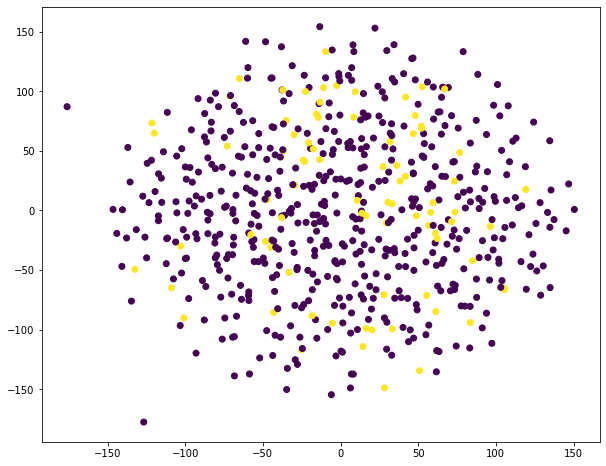

In [13]:
plt.subplots (figsize=(10, 8))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=label)

plt.show()

In [14]:
#no clustering really visible 

### Perform a Cluster Analysis with K-means
* Create an elbow plot to identify the best number of clusters. Make sure to do the following:
* Use a for loop to determine the inertia for each k between 1 through 10.
* If possible, determine where the elbow of the plot is, and at which value of k it appears.

In [15]:
inertia = []
k = range(1, 11)


In [16]:
for i in k: 
    km = KMeans(n_clusters=i, random_state=21)
    km.fit(mydf)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [17]:
# lol that's alarming

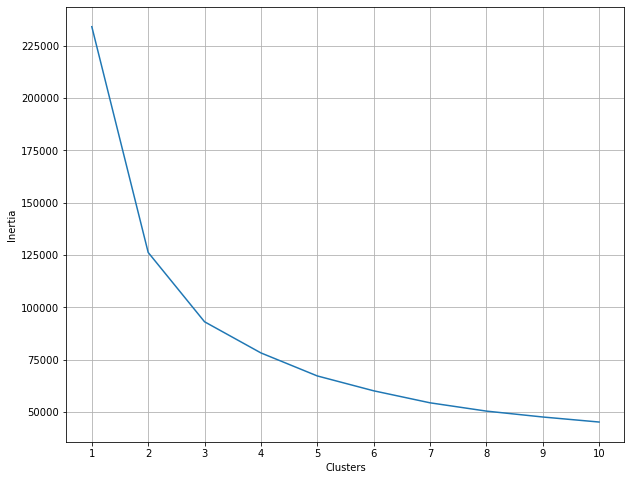

In [18]:
plt.subplots (figsize=(10, 8))
plt.grid ()
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Inertia")
plt.show()

# k= 3 

### Recommendation 
###### I would say given that it's a pretty clear elbow that the data can be separted into 3 separate groups. 

In [19]:
pca_df = pd.DataFrame(tsne_features, columns=["pc1", "pc2","pc3"])
pca_df.head()

#gave tnse 3 n components

,pc1,pc2,pc3
0,-71.329033,96.050011,-54.603092
1,-27.950115,-47.790932,-125.555794
2,-55.283916,14.478668,123.831100
3,16.365759,-4.570518,88.444504
4,70.728615,-67.411156,25.295265


In [20]:
km_model = KMeans(n_clusters=3, random_state=42)
km_model.fit(pca_df)

predicted_clusters = km_model.predict(pca_df)
pca_df['group'] = km_model.labels_

pca_df.head()

C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Helen\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


,pc1,pc2,pc3,group
0,-71.329033,96.050011,-54.603092,0
1,-27.950115,-47.790932,-125.555794,2
2,-55.283916,14.478668,123.831100,1
3,16.365759,-4.570518,88.444504,1
4,70.728615,-67.411156,25.295265,2


In [27]:
import plotly.express as px
fig = px.scatter_3d(
    pca_df,
    x="pc3",
    y="pc2",
    z="pc1",
    color="group",
    symbol="group",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

I think that given the 3d model above, a cluster of 3 is quite optimal. When zooming into the 3d model you do see some overlap, but for the most part there is pretty concise and evident clustering visible. I attempted to use the Silhouette Method to reinforce this however I could not get it to work for myself. But I think that enough evidence has been provided aleady to show strong evidence for 3 clusters. 